# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv",dtype=float)
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [2]:
data.head()
data.describe()
#data.Fresh.sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: Well, it looks that "Fresh" feature will have the biggest variance, so I suppose that PCA will pay more attention to it. Also, I can assume that "Grocery", "Milk" and "Frozen" can possibly be groupped into a single component

###PCA

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]]
[ 0.45961362  0.40517227  0.07003008  0.04402344]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: First and second principal components are nearly equiualent in terms of the variance. Together they give us 0.8647 variance of the data. First component represents mostly "Fresh" variable, and the second sets similar weights to "Milk" and "Detergents paper", possibly customers are more likely to buy those items together. 
I would probably choose 3 or 4 dimensions because together they give us nearly 0.97 of the data variance. To make visualisations it makes sense to use only two dimensions.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Each dimension represents one principal component. All components are orthogonal to each other. First principal component that represents mostly "Fresh" variable has the biggest variance. The second component is a sum(mostly) of three features: Milk, Grocery, Detergents paper. I can use this information for feature reduction and displaying the data, having captured most of the variance in the data.

###ICA

In [40]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import normalize
normalized_data = normalize(data)
ica = FastICA(whiten=True)
ica.fit(normalized_data)
# Print the independent components
print np.multiply(ica.components_,10)

[[-0.50031287  0.29414043  0.82940147  0.16271251  0.59868868 -0.00935999]
 [ 0.3155542   0.22265394 -1.94819265  0.4167615   4.80013638  0.70085872]
 [ 0.91874102 -1.97030296  1.83420309  0.44794681  1.08067736  1.03582969]
 [ 0.56935674  0.70251802  0.61023337  0.52378656 -0.00673282 -5.54948476]
 [-3.08268775 -2.35262177 -2.45457241 -2.46417223 -1.15598346 -0.3371046 ]
 [-1.42583409 -0.97136126 -0.81312652  1.6248843  -0.43473345 -0.33952517]]


In [35]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: For simplicity, I have multiplied each element of the unmixing matrix W by 10. ICA decomposition is used for separating highly mixed signals ( for example, cocktail party) into a group of K independent sources. Thus, the results of ICA can be thought like different "groups" of customers. 
1. First component [-0.50031287  0.29414043  0.82940147  0.16271251  0.59868868 -0.00935999]. This source can be rewritten as follows : -0.5*Fresh+0.294*Milk+0.8294*Grocery+0.1627*Frozen+0.5989*Detergents_Paper etc
So from the first component we can see type of customer that buys mostly Grocery and Detergents Paper. Maybe this is some sort of supermarket?
2. [ 0.3155542   0.22265394 -1.94819265  0.4167615   4.80013638  0.70085872] from this vector we can definitely say that it represents Chemists or something like that. (because of very high value of detergent_paper variable)
3. [ 0.91874102 -1.97030296  1.83420309  0.44794681  1.08067736  1.03582969] I think it's probably some sort of specific market. (e.q high "penalty" for milk product)
4. [ 0.56935674  0.70251802  0.61023337  0.52378656 -0.00673282 -5.54948476] this vector highly penalizes delicatessen and sets zero weight to detergent_paper. I suppose this can be something like fastfood restaraunt.
5. [-3.08268775 -2.35262177 -2.45457241 -2.46417223 -1.15598346 -0.3371046 ] This component has all elements less than zero, I assume this maybe some kind of small local shop.
6.  [-1.42583409 -0.97136126 -0.81312652  1.6248843  -0.43473345 -0.33952517]] From the high value of "Frozen" feature I suppose this can be something like "IceCream shop" of another kind of fastfood. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?.

Answer: K-Means is a special case of Gaussian Mixed model. What K-Means do is called "hard" clustering because each point always belongs to only one class with probability equals 1. GMM assigns to each point probability that it belongs to some class. Even points that are very unlikely to belong to some class j will still have some non-zero probability to belong to this class. 
Among disadvantages of K-Means are : 
1.) K-Means tend to find local-optima. For this reason choosing different initial clusters can lead to different results. Can overcome this by choosing 
2.) Doesn't work well with clusters of different size and density.
3.) Makes an assumption that variance of each attribute is spherical. If it's not the case - results would be broken
4.) Each point is assigned to exactly one cluster. Suppose situation where K=2 and there are several points on the equal distance from each of the clusters. Those points would be assigned to one of the two clusters by the choice.
5.) Strong sensitivy to outliers
At the same time, K-Means is effective algorithm in terms of performance and is quite simple to perform. 

GMM assumes that there points are takes from K-different gaussian distributions and assigns the probability of each point belonging to some class. For that reason, GMM doesn't have a problem 4. of the K-Means. GMM also takes a lot more time to make clustering, so in the situation where our data size is big - it makes more sense to use K-Means.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [187]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [223]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [209]:
def sort_reduced(arr):
    return arr[arr[:, 0].argsort()]

In [237]:
reduced_data = sort_reduced(reduced_data)

In [238]:
reduced_data = reduced_data[40:]

I have noticed that reduced_data has some outliers so I decided to eliminate them manually and check results.

In [239]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.


# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
Changed code slightly for simpler usage

In [240]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

#centroids = clusters.means_print centroids
def fit_cluster(n_components = 3):
    clusters = GMM(n_components=n_components)
    clusters.fit(reduced_data)
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    centroids = clusters.means_
    return Z,centroids
Z, centroids = fit_cluster(3)

In [241]:

def plot(Z, centroids):
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

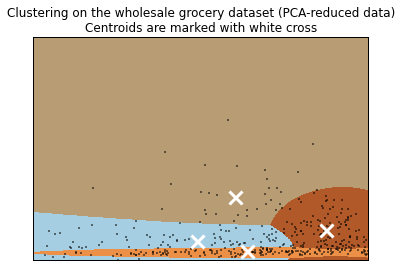

In [245]:
Z, centroids = fit_cluster(4)
plot(Z, centroids)

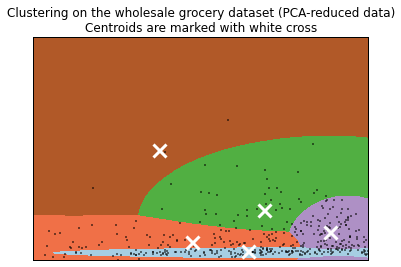

In [244]:
Z, centroids = fit_cluster(5)
plot(Z, centroids)

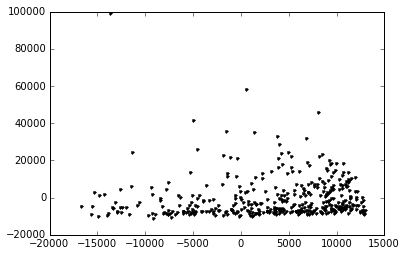

In [243]:
plt.plot(reduced_data[:,0], reduced_data[:,1],'k.')

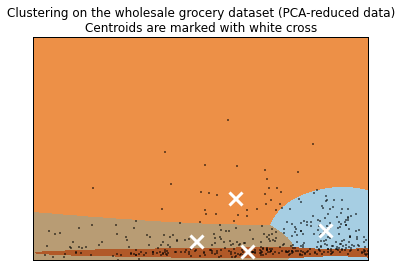

In [254]:
Z, centroids = fit_cluster(4)
plot(Z, centroids)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: From the PCA we must remember that first component was responsible for "Fresh" variable, and the second component was the linear combination of mostly three features : Milk, Grocery and detergents. Having run K-Means several times with different number of components I came up with K = 4. 
Blue cluster - is possibly a product market. It has high "Fresh" value, and average "Grocery, Milk and Detergents" values. 
Brown cluster represents possibly restaraunts because of low "Grocery Milk and Detergents" values and a big range of "Fresh" values. 
Grey cluster represents middle-sized shops.
And orange cluster definitely represents big supermarkets, with wide range of products. 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: Using PCA for feature reduction is really useful approach, so we can display our data, even if it was of high dimensionality. I think ICA isn't an obvious choice for this kind of task, but it also gave some insight of the data.

**9)** How would you use that technique to help the company design new experiments?

Answer: For clustering we have used only two principal components. That means that "Frozen" feature was completely irrelevant for this project. Possibly, it makes sense to replace "Frozen" category with another category. Also, we can see that "Milk" and "Grocery" are correlated, so I think they can be groupped into one category. 

**10)** How would you use that data to help you predict future customer needs?

Answer: If we "correctly" cluster the data - we can divide all our customers into several categories like : supermarkets, restaraunts, or chemist. Having this knowledge, we can better understand what types of products our customers will need. Futhermore, if we will have a new customer, knowing his type( for example, we a priori know it's a restaraunt) we can predict what kind of products and how much they will want to buy by using, for example, decision tree classifier, or linear regression. 

In [277]:
np.corrcoef(data.Milk, data.Grocery)

array([[ 1.        ,  0.72833512],
       [ 0.72833512,  1.        ]])